# GravitoMagnetic Project

This is a collaboration wit Prof. Cristian Barrera from Universidad de Valparaíso. We aim to quantify the Signal to Noise ratio of the cross correlation between the kSZ effect with blabla.

## First we load some libraries

In [3]:
import numpy as np
import h5py
import os
# import pandas as pd
# import yt
import matplotlib.pyplot as plt
# from numba import jit
from typing import Generic, TypeVar, Callable, Tuple
from functools import reduce
# h5py.run_tests()

## Loading the data

Given that the position of the particles is in integers, we need to convert it to a physical position in Mpc/h. The conversion for a given integer is:
\begin{equation}
x_\text{phys} = x_\text{int} \frac{L}{2^{32}},
\end{equation}

where $L=500$ Mpc/h is the length of the simulation box.

In [6]:
with h5py.File("../snapdir_000/snap_000.0.hdf5", "r") as f:
    print(list(f.keys()))
    print(list(f["PartType1"].keys()))

['Config', 'Header', 'Parameters', 'PartType1']
['Coordinates', 'IntegerCoordinates', 'ModifiedGravityEffectiveMass', 'ModifiedGravityPhi', 'ParticleIDs', 'Velocities']


Here we create the 'Coordinates' in the hdf5 files.

In [ ]:
L = 500

for i in range(8):
    with h5py.File("snapdir_000/snap_000."+str(i)+".hdf5", "a") as f:
        # Get the IntegerCoordinates dataset
        int_coords = f["PartType1/IntegerCoordinates"][:]

        # Convert IntegerCoordinates to physical coordinates
        phys_coords = int_coords * L / (2 ** 32)

        # Create a new dataset for the physical coordinates (Coordinates)
        f.create_dataset("PartType1/Coordinates", data=phys_coords)

In [ ]:
def read_snap(N,snap,path):
  """
  Function given by Cristian's collaborator.
  """
  Lbox = 500. #L=1500 Mpc/h or 500 Mpc/h
  pos_c = [None]*N

  path = path+'/snapdir_%03d/'%snap

  print("Data read from %s"%path)
  
  infile = h5py.File(path+"snap_%03d.0.hdf5"%snap,"r")
  print ('Redshift z=%1.2f'%infile["Header"].attrs["Redshift"])
  
  for i in range(N):
    f = h5py.File(path+"snap_%03d.%i.hdf5"%(snap,i),"r")
    pos_c[i] = f["PartType1/IntegerCoordinates"][...]
    f.close()

  pos_c = np.concatenate(pos_c)
  return pos_c/pow(2.0,32)*Lbox

path_GR = os.getcwd()
path1_a =  path_GR
posa_GR = read_snap(8,0,path1_a)

# Attempts

Now we are ready to read the data, and explore some things that yt is able to do. BEFORE loading data, we should ask yt to derive the density field.

In [49]:
# @derived_field(name="density", units="g/cm**3", sampling_type="cell")

# def particle_density(field, data):
#     pos = data['PartType1', 'Coordinates']
#     pos.convert_to_units("code_length")
#     mass = data['PartType1', 'Masses']
#     mass.convert_to_units("code_mass")
#     d = data.deposit(pos, [mass], method="sum")
#     d = data.ds.arr(d, "code_mass")
#     d /= data["index", "cell_volume"]
#     return d

In [9]:
ds = yt.load('snapdir_000/snap_000.0.hdf5')

yt : [INFO     ] 2025-08-18 17:51:38,027 Calculating time from 2.507e-01 to be 6.810e+16 seconds
yt : [INFO     ] 2025-08-18 17:51:38,065 Parameters: current_time              = 6.8095920707497464e+16 s
yt : [INFO     ] 2025-08-18 17:51:38,066 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-18 17:51:38,066 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-18 17:51:38,067 Parameters: domain_right_edge         = [500. 500. 500.]
yt : [INFO     ] 2025-08-18 17:51:38,067 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-18 17:51:38,067 Parameters: current_redshift          = 2.9891842243418814
yt : [INFO     ] 2025-08-18 17:51:38,068 Parameters: omega_lambda              = 0.68685
yt : [INFO     ] 2025-08-18 17:51:38,068 Parameters: omega_matter              = 0.31315
yt : [INFO     ] 2025-08-18 17:51:38,068 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-18 17:51:38,069 Parameters: hubble_constant 

In [4]:
ds.field_list

[('PartType1', 'Coordinates'),
 ('PartType1', 'IntegerCoordinates'),
 ('PartType1', 'Masses'),
 ('PartType1', 'ModifiedGravityEffectiveMass'),
 ('PartType1', 'ModifiedGravityPhi'),
 ('PartType1', 'ParticleIDs'),
 ('PartType1', 'Velocities'),
 ('all', 'Coordinates'),
 ('all', 'IntegerCoordinates'),
 ('all', 'Masses'),
 ('all', 'ModifiedGravityEffectiveMass'),
 ('all', 'ModifiedGravityPhi'),
 ('all', 'ParticleIDs'),
 ('all', 'Velocities'),
 ('nbody', 'Coordinates'),
 ('nbody', 'IntegerCoordinates'),
 ('nbody', 'Masses'),
 ('nbody', 'ModifiedGravityEffectiveMass'),
 ('nbody', 'ModifiedGravityPhi'),
 ('nbody', 'ParticleIDs'),
 ('nbody', 'Velocities')]

In [3]:
ds.derived_field_list

yt : [INFO     ] 2025-08-18 12:47:31,105 Allocating for 1.074e+09 particles
Loading particle index: 100%|██████████| 4100/4100 [00:00<00:00, 6972.80it/s]


[('PartType1', 'Coordinates'),
 ('PartType1', 'IntegerCoordinates'),
 ('PartType1', 'Masses'),
 ('PartType1', 'ModifiedGravityEffectiveMass'),
 ('PartType1', 'ModifiedGravityPhi'),
 ('PartType1', 'ParticleIDs'),
 ('PartType1', 'Velocities'),
 ('PartType1', 'particle_angular_momentum'),
 ('PartType1', 'particle_angular_momentum_magnitude'),
 ('PartType1', 'particle_angular_momentum_x'),
 ('PartType1', 'particle_angular_momentum_y'),
 ('PartType1', 'particle_angular_momentum_z'),
 ('PartType1', 'particle_index'),
 ('PartType1', 'particle_mass'),
 ('PartType1', 'particle_ones'),
 ('PartType1', 'particle_position'),
 ('PartType1', 'particle_position_cylindrical_radius'),
 ('PartType1', 'particle_position_cylindrical_theta'),
 ('PartType1', 'particle_position_cylindrical_z'),
 ('PartType1', 'particle_position_relative_x'),
 ('PartType1', 'particle_position_relative_y'),
 ('PartType1', 'particle_position_relative_z'),
 ('PartType1', 'particle_position_spherical_phi'),
 ('PartType1', 'particl

In [5]:
print(ds.field_info["deposit", "PartType1_density"].get_source())

    def particle_density(field, data):
        pos = data[ptype, coord_name]
        pos.convert_to_units("code_length")
        mass = data[ptype, mass_name]
        mass.convert_to_units("code_mass")
        d = data.deposit(pos, [mass], method="sum")
        d = data.ds.arr(d, "code_mass")
        d /= data["index", "cell_volume"]
        return d



In [6]:
print(ds.domain_width.in_units("kpc"))
print(ds.domain_width.in_units("au"))
print(ds.domain_width.in_units("mile"))

[186045.60843463 186045.60843463 186045.60843463] kpc
[3.83746614e+13 3.83746614e+13 3.83746614e+13] AU
[3.56714763e+21 3.56714763e+21 3.56714763e+21] mile


In [7]:
print(ds.particle_types)
print(ds.particle_types_raw)
print(ds.particle_type_counts)

('PartType1', 'all', 'nbody')
('PartType1',)
{'PartType0': np.int64(0), 'PartType1': np.int64(1073741824), 'PartType2': np.int64(0), 'PartType3': np.int64(0), 'PartType4': np.int64(0), 'PartType5': np.int64(0)}


In [8]:
1073741824**(1/3)

1023.9999999999997

In [3]:
percent = 1

left_edge  = [0.0, 0.0, 0.0]
right_edge = [percent/100] * 3

region = ds.box(left_edge, right_edge)

In [4]:
dm_mass = region[("PartType1", "particle_mass")]
print(f"Number of DM particles: {len(dm_mass)}")
print(f"Number of DM particles per dimension: {len(dm_mass)**(1/3)}")


yt : [INFO     ] 2025-05-22 17:37:12,175 Allocating for 1.074e+09 particles
Loading particle index: 100%|██████████| 4100/4100 [00:00<00:00, 9524.34it/s]


Number of DM particles: 1049
Number of DM particles per dimension: 10.16073588817026


In [5]:
# Get particle positions and masses
pos = region[('PartType1', 'Coordinates')].to("code_length").to_ndarray()
mass = region[('PartType1', 'Masses')].to("code_mass").to_ndarray()

In [6]:
N = pos.shape[0]
L = 500
res = L/N
dim = 3
shape = (N,) * dim
size = reduce(lambda x, y: x*y, shape)

In [7]:
@jit(nopython=False)
def md_cic_2d(shape: Tuple[int], pos: np.ndarray, tgt: np.ndarray):
    for i in range(len(pos)):
        idx0, idx1 = int(np.floor(pos[i,0])), int(np.floor(pos[i,1]))
        f0, f1     = pos[i,0] - idx0, pos[i,1] - idx1
        tgt[idx0 % shape[0], idx1 % shape[1]] += (1 - f0) * (1 - f1)
        tgt[(idx0 + 1) % shape[0], idx1 % shape[1]] += f0 * (1 - f1)
        tgt[idx0 % shape[0], (idx1 + 1) % shape[1]] += (1 - f0) * f1
        tgt[(idx0 + 1) % shape[0], (idx1 + 1) % shape[1]] += f0 * f1

In [8]:
# CIC

M = mass[0]

rho = np.zeros(1049)

cic = md_cic_2d(shape, pos, rho)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 1d, C), UniTuple(int64 x 2))
 
There are 22 candidate implementations:
[1m     - Of which 20 did not match due to:
     Overload of function 'getitem': File: <numerous>: Line N/A.
       With argument(s): '(array(float64, 1d, C), UniTuple(int64 x 2))':[0m
[1m      No match.[0m
[1m     - Of which 2 did not match due to:
     Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 211.
       With argument(s): '(array(float64, 1d, C), UniTuple(int64 x 2))':[0m
[1m      Rejected as the implementation raised a specific error:
        NumbaTypeError: [1mcannot index array(float64, 1d, C) with 2 indices: UniTuple(int64 x 2)[0m[0m
  raised from /opt/anaconda3/envs/gravB_env/lib/python3.13/site-packages/numba/core/typing/arraydecl.py:133
[0m
[0m[1mDuring: typing of intrinsic-call at /var/folders/5s/qjyr0m0s7md6xl0nnsqwt72h0000gn/T/ipykernel_19980/2917548958.py (6)[0m
[1m
File "../../../../../var/folders/5s/qjyr0m0s7md6xl0nnsqwt72h0000gn/T/ipykernel_19980/2917548958.py", line 6:[0m
[1m<source missing, REPL/exec in use?>[0m

[0m[1mDuring: Pass nopython_type_inference[0m

In [18]:
rho = np.ones(1049)

In [ ]:
rho = np.zeros(1049)
rho = md_cic_2d(128, pos,)

In [33]:
rho[:,:,0]

array([[1.77390342e+01, 2.24782178e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.27833432e-02, 2.87262951e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(128, 128))

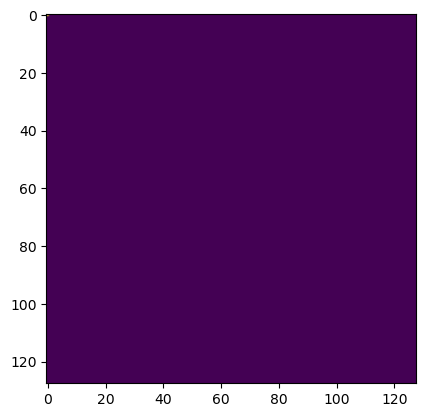

In [35]:
fig, ax = plt.subplots()

ax.imshow(rho[:,:,0])
# ax.set_xlim(0,10)
# ax.set_ylim(0,10)


In [ ]:
from yt.utilities.power_spectrum import FFTPower
ps = FFTPower(cg, fields=[("deposit", "PartType1_density")])
k, Pk = ps.get_power_spectrum()

YTNonIndexedDataContainer: The data container type (ParticleContainer) is an unindexed type. Operations such as ires, icoords, fcoords and fwidth will not work on it.
Did you just attempt to perform an off-axis operation ? Be sure to consult the latest documentation to see whether the operation you tried is actually supported for your data type.

In [ ]:
yt.SlicePlot(ds, "y", ("gas", "density"), width=(1.0, "mpc"))

AttributeError: 'YTSlice' object has no attribute 'deposit'

TODO:
Check if nbody, all and partype1 refer to a dm particle
Visualize slices of the density field derived by yt
Measure matter power spectrum, to see if linear order agrees with the CLASS prediction

# Visualization